> 在人工智能领域的不断发展中，语言模型扮演着重要的角色。特别是大型语言模型（LLM），如 ChatGPT，已经成为科技领域的热门话题，并受到广泛认可。在这个背景下，LangChain 作为一个以 LLM 模型为核心的开发框架出现，为自然语言处理开启了一个充满可能性的世界。借助 LangChain，我们可以创建各种应用程序，包括聊天机器人和智能问答工具。

# LangChain 简介

LangChain 的作者是 Harrison Chase，最初是于 2022 年 10 月开源的一个项目，在 GitHub 上获得大量关注之后迅速转变为一家初创公司。2017 年 Harrison Chase 还在哈佛上大学，如今已是硅谷的一家热门初创公司的 CEO，这对他来说是一次重大而迅速的跃迁。Insider 独家报道，人工智能初创公司 LangChain 在种子轮一周后，再次获得红杉领投的 2000 万至 2500 万美元融资，估值达到 2 亿美元。

## LangChain 为什么这么火

笔者认为 Langchain 作为一个大语言模型应用开发框架，解决了现在开发人工智能应用的一些切实痛点。以 GPT 模型为例：

1. 数据滞后，现在训练的数据是到 2021 年 9 月。
2. token 数量限制，如果让它对一个 300 页的 pdf 进行总结，直接使用则无能为力。
3. 不能进行联网，获取不到最新的内容。
4. 不能与其他数据源链接。

另外作为一个胶水层框架，极大地提高了开发效率，它的作用可以类比于 jquery 在前端开发中的角色，使得开发者可以更专注于创新和优化产品功能。


## LLM 应用架构

LangChian 作为一个大语言模型开发框架，是 LLM 应用架构的重要一环。那什么是 LLM 应用架构呢？其实就是指基于语言模型的应用程序设计和开发的架构。

LangChian 可以将 LLM 模型、向量数据库、交互层 Prompt、外部知识、外部工具整合到一起，进而可以自由构建 LLM 应用。

# LangChain 组件

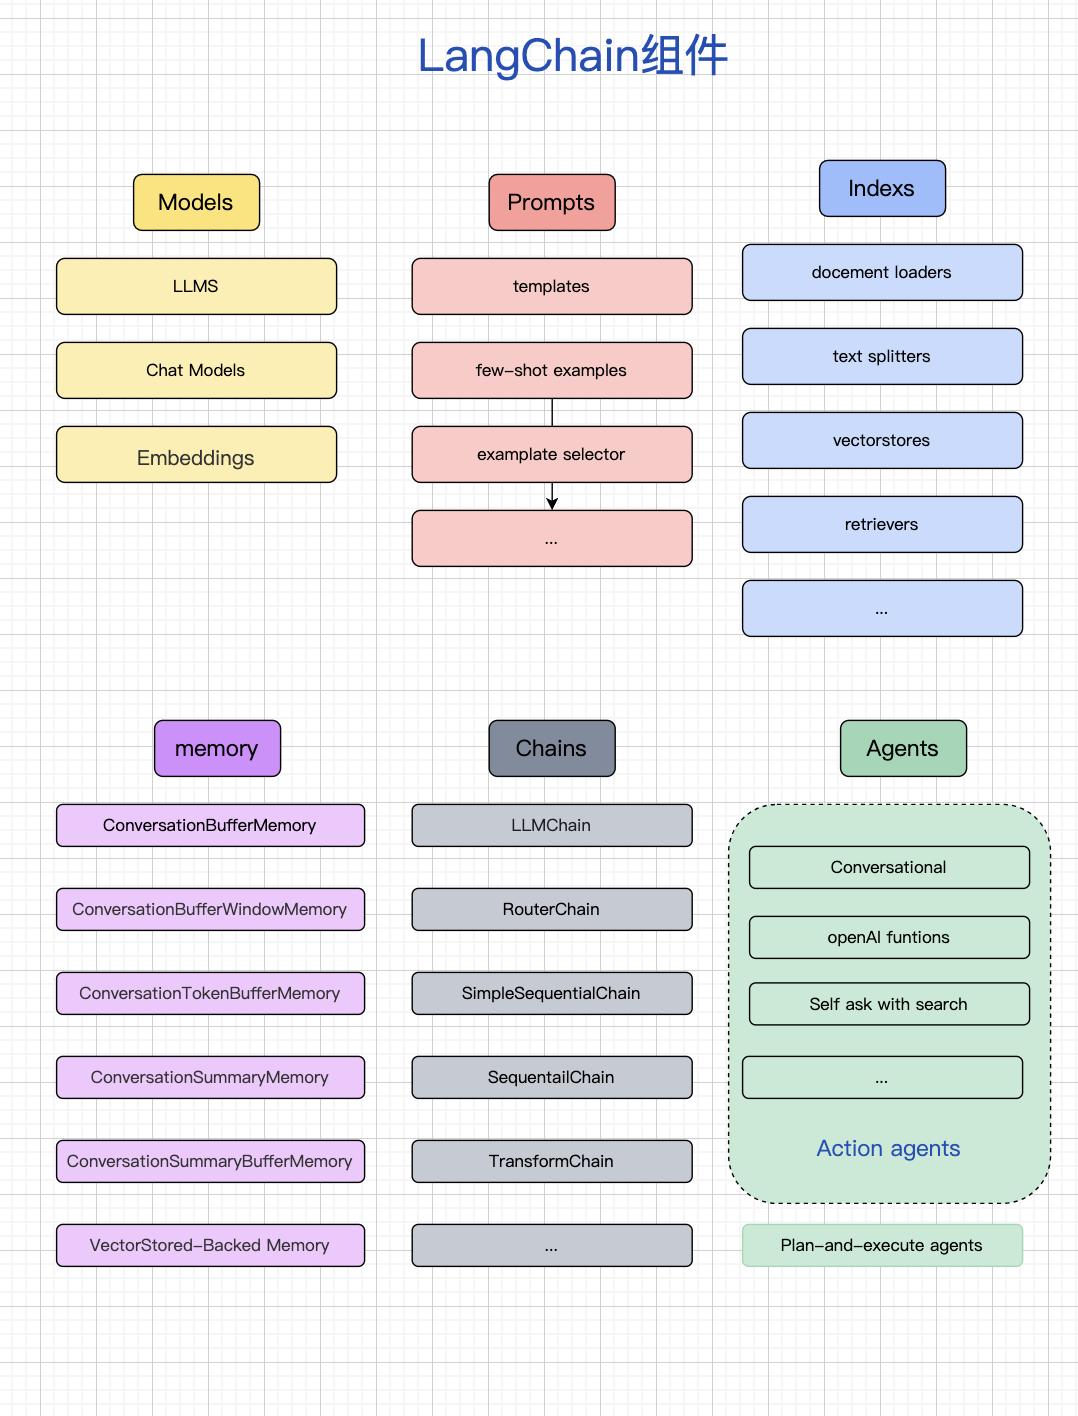

## Models（模型）

### 聊天模型

LangChain 为使用聊天模型提供了一个标准接口。聊天模型是语言模型的一种变体。虽然聊天模型在内部使用语言模型，但它们所提供的接口略有不同。它们不是暴露一个 "输入文本，输出文本" 的 API，而是提供了一个以 "聊天消息" 作为输入和输出的接口。

聊天模型的接口是基于消息而不是原始文本。LangChain 目前支持的消息类型有 AIMessage、HumanMessage、SystemMessage 和 ChatMessage，其中 ChatMessage 接受一个任意的角色参数。大多数情况下，您只需要处理 HumanMessage、AIMessage 和 SystemMessage。


In [1]:
# 导入OpenAI的聊天模型，及消息类型
from langchain.chat_models import ChatOpenAI
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

# 初始化聊天对象
chat = ChatOpenAI(
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)

# 向聊天模型发问
chat([HumanMessage(content="Translate this sentence from English to French: I love programming.")])

AIMessage(content="J'adore la programmation.", additional_kwargs={}, example=False)

OpenAI 聊天模式支持多个消息作为输入。这是一个系统和用户消息聊天模式的例子:

In [2]:
messages = [
    SystemMessage(content="You are a helpful assistant that translates English to French."),
    HumanMessage(content="I love programming.")
]
chat(messages)

AIMessage(content="J'adore programmer.", additional_kwargs={}, example=False)

当然也可以进行批量处理，批量输出。

In [3]:
batch_messages = [
    [
        SystemMessage(content="You are a helpful assistant that translates English to French."),
        HumanMessage(content="I love programming.")
    ],
    [
        SystemMessage(content="You are a helpful assistant that translates English to French."),
        HumanMessage(content="I love artificial intelligence.")
    ],
]
result = chat.generate(batch_messages)
result

LLMResult(generations=[[ChatGeneration(text="J'adore programmer.", generation_info={'finish_reason': 'stop'}, message=AIMessage(content="J'adore programmer.", additional_kwargs={}, example=False))], [ChatGeneration(text="J'adore l'intelligence artificielle.", generation_info={'finish_reason': 'stop'}, message=AIMessage(content="J'adore l'intelligence artificielle.", additional_kwargs={}, example=False))]], llm_output={'token_usage': {'prompt_tokens': 53, 'completion_tokens': 18, 'total_tokens': 71, 'pre_token_count': 8192, 'pre_total': 84, 'adjust_total': 82, 'final_total': 2}, 'model_name': 'gpt-3.5-turbo'}, run=[RunInfo(run_id=UUID('358d04f3-6d61-4eda-883b-55cbfde512f3')), RunInfo(run_id=UUID('612527f7-f5fe-4051-b0c7-08bb7033f778'))])

上面介绍了聊天的角色处理以及如何进行批量处理消息。我们都知道向 openAI 调用接口都是要花钱的，如果用户问同一个问题，对结果进行了缓存，这样就可以减少接口的调用并且也能加快接口返回的速度。LangChain 也很贴心的提供了缓存的功能。并且提供了两种缓存方案，内存缓存方案和数据库缓存方案，当然支持的数据库缓存方案有很多种。

In [5]:
import langchain
from langchain import OpenAI
from langchain.cache import SQLiteCache

# 设置语言模型的缓存数据存储的地址
langchain.llm_cache = SQLiteCache(database_path=".langchain.db")

# 加载 llm 模型
llm = OpenAI(
    temperature=0.7,
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)

# 第一次向模型提问
result = llm('tell me a joke')
print(result)

# 第二次向模型提问同样的问题
result2 = llm('tell me a joke')
print(result2)



Q: What did the fish say when he hit the wall?
A: Dam!


Q: What did the fish say when he hit the wall?
A: Dam!


### 嵌入

用于文档、文本或者大量数据的总结、问答场景，一般是和向量库一起使用，实现向量匹配。其实就是把文本等内容转成多维数组，可以后续进行相似性的计算和检索。他相比 fine-tuning 最大的优势就是，不用进行训练，并且可以实时添加新的内容，而不用加一次新的内容就训练一次，并且各方面成本要比 fine-tuning 低很多。

In [10]:
# 导入os, 设置环境变量，导入OpenAI的嵌入模型
import os
from langchain.embeddings.openai import OpenAIEmbeddings
os.environ["OPENAI_API_KEY"] = 'your apikey'

# 初始化嵌入模型
embeddings = OpenAIEmbeddings(
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)

# 把文本通过嵌入模型向量化
res = embeddings.embed_query('hello world')

res

[-0.014945968561528862,
 0.0014304016270960535,
 -0.018488228948600204,
 -0.031050744589080855,
 -0.02433493443474316,
 0.007440063889279544,
 -0.02297860461981071,
 -0.0009859730824209564,
 -0.012792959312197465,
 -0.022517715413731865,
 0.02584928361891924,
 0.010850642244750035,
 -0.03305231891999465,
 -0.003805625614426303,
 0.0058104924035837545,
 0.013892508583431627,
 0.019528521887690612,
 -0.022820585250567082,
 0.018382883323319523,
 0.011278610128021385,
 -0.006189079699627774,
 0.008704216514922052,
 0.006607171837982701,
 -0.008098476841251619,
 -0.014656267626345686,
 -0.010883562636234922,
 0.01830387363869771,
 -0.013629143588907319,
 0.019251987991514265,
 -0.039162387538016694,
 0.0025003222665970354,
 -0.004776784380980669,
 -0.017671798024368413,
 -0.014853790906577615,
 0.010402921009000626,
 -0.009441638685854637,
 8.405049733184516e-05,
 -0.01830387363869771,
 0.02420325286880361,
 -0.0196733723552822,
 0.00934287658007737,
 -0.001291311971900604,
 0.017487442714

## Prompts（提示词）

### Prompt Templates

LangChain 提供了 PromptTemplates，允许你可以根据用户输入动态地更改提示，如果你有编程基础，这应该对你来说很简单。当用户需要输入多个类似的 prompt 时，生成一个 prompt 模板是一个很好的解决方案，可以节省用户的时间和精力。下面是一个示例，将 LLM 作为一个给新开商店命名的顾问，用户只需告诉 LLM 商店的主要特点，它将返回 10 个新开商店的名字。

In [1]:
from langchain.llms import OpenAI

# 定义生成商店的方法
def generate_store_names(store_features):
    prompt_template = "我正在开一家新的商店，它的主要特点是{0}。请帮我想出10个商店的名字。"
    prompt = [prompt_template.format(x) for x in store_features]

    llm = OpenAI(
        openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
        openai_api_base='https://openai.api2d.net/v1'
    )
    print(prompt)
    response = llm.generate(prompt, max_tokens=100, temperature=0)
    print(response.generations)
    store_names = [gen[0].text.strip() for gen in response.generations]
    return store_names

store_features = ["时尚", "创意", "独特"]

store_names = generate_store_names(store_features)
print(store_names)

['我正在开一家新的商店，它的主要特点是时尚。请帮我想出10个商店的名字。', '我正在开一家新的商店，它的主要特点是创意。请帮我想出10个商店的名字。', '我正在开一家新的商店，它的主要特点是独特。请帮我想出10个商店的名字。']
[[Generation(text='\n\n1. Fashionista Boutique \n2. Trendy Threads \n3. Style Station \n4. Chic Closet \n5. Glamour Gear \n6. Catwalk Collection \n7. Runway Ready \n8. Designer Den \n9. Fabulous Finds \n10. Trendy Treasures', generation_info={'finish_reason': 'stop', 'logprobs': None})], [Generation(text='\n\n1. Creative Corner \n2. Imagination Station \n3. Idea Factory \n4. Brainstorm Boutique \n5. Innovative Outlet \n6. Think Tank Store \n7. Creative Express \n8. Creative Hub \n9. Creative Marketplace \n10. Creative Haven', generation_info={'finish_reason': 'stop', 'logprobs': None})], [Generation(text='\n\n1. Unique Boutique \n2. One of a Kind Store \n3. Rare Finds \n4. Unusual Treasures \n5. Exotic Emporium \n6. Off the Beaten Path \n7. Odds & Ends \n8. Quirky Corner \n9. Unconventional Marketplace \n10. Out of the Ordinary Shop', generation_info={'finish_reason': '

### Few-shot example
Few-shot examples 是一组可用于帮助语言模型生成更好响应的示例。要生成具有 few-shot examples 的 prompt，可以使用 FewShotPromptTemplate。该类接受一个 PromptTemplate 和一组 few-shot examples。然后，它使用这些 few-shot examples 格式化 prompt 模板。

In [2]:
from langchain import PromptTemplate, FewShotPromptTemplate
from langchain.llms import OpenAI

examples = [
    {"word": "黑", "antonym": "白"},
    {"word": "伤心", "antonym": "开心"},
]

example_template = """
单词: {word}
反义词: {antonym}\\n
"""

# 创建提示词模版
example_prompt = PromptTemplate(
    input_variables=["word", "antonym"],
    template=example_template,
)

# 创建小样本提示词模版
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix="给出每个单词的反义词",
    suffix="单词: {input}\\n反义词:",
    input_variables=["input"],
    example_separator="\\n",
)

# 格式化小样本提示词
prompt_text = few_shot_prompt.format(input="粗")

# 调用OpenAI
llm = OpenAI(temperature=0.9,
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)

print(llm(prompt_text))

 细


### Example Selector
如果你有大量的示例，则可以使用 ExampleSelector 来选择最有信息量的一些示例，以帮助你生成更可能产生良好响应的提示。接下来，我们将使用 LengthBasedExampleSelector，根据输入的长度选择示例。当你担心构造的提示将超过上下文窗口的长度时，此方法非常有用。对于较长的输入，它会选择包含较少示例的提示，而对于较短的输入，它会选择包含更多示例。

In [3]:
from langchain.prompts import PromptTemplate, FewShotPromptTemplate
from langchain.prompts.example_selector import LengthBasedExampleSelector
from langchain.prompts.example_selector import LengthBasedExampleSelector


# These are a lot of examples of a pretend task of creating antonyms.
examples = [
    {"word": "happy", "antonym": "sad"},
    {"word": "tall", "antonym": "short"},
    {"word": "energetic", "antonym": "lethargic"},
    {"word": "sunny", "antonym": "gloomy"},
    {"word": "windy", "antonym": "calm"},
]
# 例子格式化模版
example_formatter_template = """
Word: {word}
Antonym: {antonym}\n
"""
example_prompt = PromptTemplate(
    input_variables=["word", "antonym"],
    template=example_formatter_template,
)

# 使用 LengthBasedExampleSelector来选择例子
example_selector = LengthBasedExampleSelector(
    examples=examples,
    example_prompt=example_prompt,
    # 最大长度
    max_length=25,
)

# 使用'example_selector'创建小样本提示词模版
dynamic_prompt = FewShotPromptTemplate(
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix="Give the antonym of every input",
    suffix="Word: {input}\nAntonym:",
    input_variables=["input"],
    example_separator="\n\n",
)

longString = "big and huge and massive and large and gigantic and tall and much much much much much bigger than everything else"

print(dynamic_prompt.format(input=longString))

Give the antonym of every input

Word: big and huge and massive and large and gigantic and tall and much much much much much bigger than everything else
Antonym:


## Indexes（索引）

索引是指对文档进行结构化的方法，以便 LLM 能够更好的与之交互。该组件主要包括：Document Loaders（文档加载器）、Text Splitters（文本拆分器）、VectorStores（向量存储器）以及 Retrievers（检索器）。

### Document Loaders
指定源进行加载数据的。将特定格式的数据，转换为文本。如 CSV、File Directory、HTML、JSON、Markdown、PDF。另外使用相关接口处理本地知识，或者在线知识。如 Airbyte JSON Airtable、Alibaba Cloud MaxCompute、wikipedia、BiliBili、GitHub、GitBook 等等。

### Text Splitters
由于模型对输入的字符长度有限制，我们在碰到很长的文本时，需要把文本分割成多个小的文本片段。文本分割最简单的方式是按照字符长度进行分割，但是这会带来很多问题，比如说如果文本是一段代码，一个函数被分割到两段之后就成了没有意义的字符，所以整体的原则是把语义相关的文本片段放在一起。

LangChain 中最基本的文本分割器是 CharacterTextSplitter ，它按照指定的分隔符（默认“\n\n”）进行分割，并且考虑文本片段的最大长度。

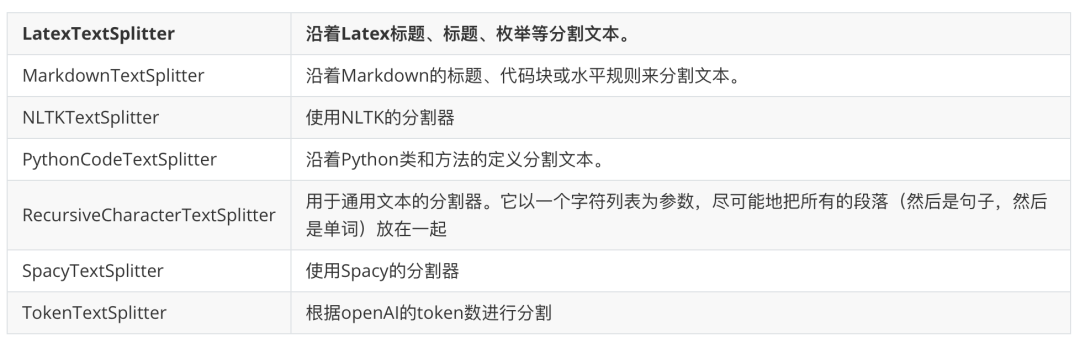

In [9]:
from langchain.text_splitter import CharacterTextSplitter

# 初始字符串
state_of_the_union = """
今天开心
明天开心
"""

text_splitter = CharacterTextSplitter(
    separator = "\\n\\n",
    chunk_size = 1000,
    chunk_overlap  = 200,
    length_function = len,
)

texts = text_splitter.create_documents([state_of_the_union])
texts

[Document(page_content='今天开心\n明天开心', metadata={})]

### VectorStores
存储提取的文本向量，包括 Faiss、Milvus、Pinecone、Chroma 等。如下是 LangChain 集成的向量数据库。

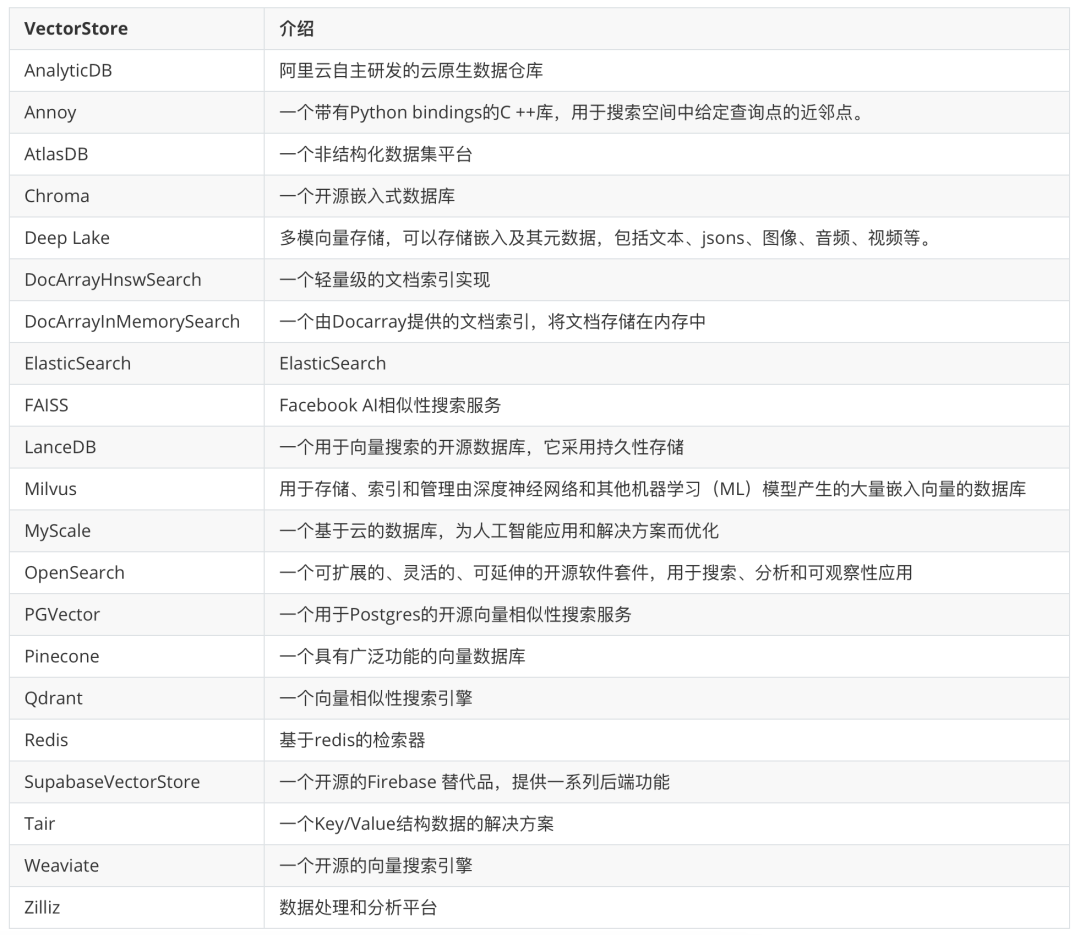

## Chains（链）

链允许我们将多个组件组合在一起以创建一个单一的、连贯的任务。例如，我们可以创建一个链，它接受用户输入，使用 PromptTemplate 对其进行格式化，然后将格式化的响应传递给 LLM。另外我们也可以通过将多个链组合在一起，或者将链与其他组件组合来构建更复杂的链。

### LLMChain
LLMChain 是一个简单的链，它围绕语言模型添加了一些功能。它在整个 LangChain 中广泛使用，包括在其他链和代理中。它接受一个提示模板，将其与用户输入进行格式化，并返回 LLM 的响应。

In [12]:
from langchain import PromptTemplate, OpenAI, LLMChain

prompt_template = "What is a good name for a company that makes {product}?"

llm = OpenAI(
    temperature=0,
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)

llm_chain = LLMChain(
    llm=llm,
    prompt=PromptTemplate.from_template(prompt_template),
)
llm_chain("colorful socks")

{'product': 'colorful socks', 'text': '\n\nSocktastic!'}

### SimpleSequentialChain
顺序链的最简单形式，其中每个步骤都有一个单一的输入/输出，并且一个步骤的输出是下一步的输入。

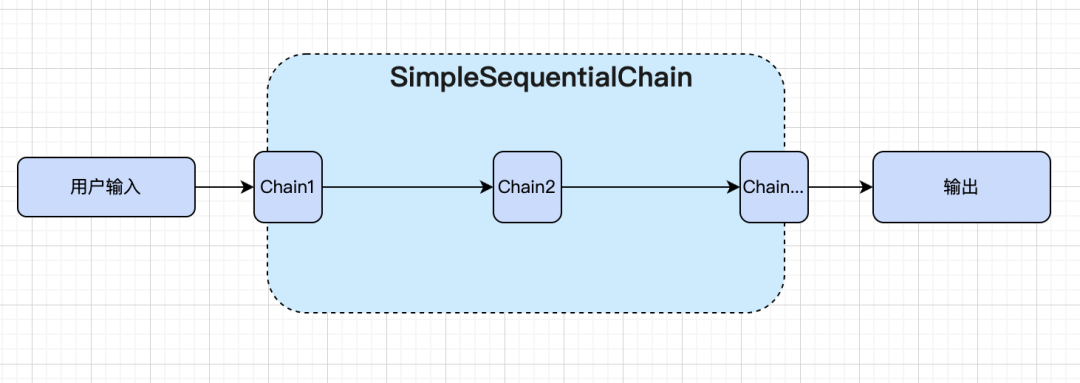

In [14]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

# 定义第一个chain
llm = OpenAI(
    temperature=.7,
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)
template = """You are a playwright. Given the title of play, it is your job to write a synopsis for that title.

Title: {title}
Playwright: This is a synopsis for the above play:"""
prompt_template = PromptTemplate(input_variables=["title"], template=template)
synopsis_chain = LLMChain(llm=llm, prompt=prompt_template)

# 定义第二个chain

llm = OpenAI(
    temperature=.7,
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)
template = """You are a play critic from the New York Times. Given the synopsis of play, it is your job to write a review for that play.

Play Synopsis:
{synopsis}
Review from a New York Times play critic of the above play:"""
prompt_template = PromptTemplate(input_variables=["synopsis"], template=template)
review_chain = LLMChain(llm=llm, prompt=prompt_template)

# 通过简单顺序链组合两个LLMChain
overall_chain = SimpleSequentialChain(chains=[synopsis_chain, review_chain], verbose=True)

# 执行顺序链
review = overall_chain.run("Tragedy at sunset on the beach")



> Entering new SimpleSequentialChain chain...


Tragedy at Sunset on the Beach is a story of love, loss, and redemption. The story follows a young couple, Alex and Stella, who are madly in love and plan to spend their lives together. On the night of their engagement, tragedy strikes when Stella is taken away from Alex in a sudden and unexpected accident. 

Devastated and heartbroken, Alex is unable to cope with the loss and decides to run away from home. He finds himself at a beach at sunset, the same beach where he and Stella had once shared a romantic picnic. There, he meets a mysterious stranger who helps him to come to terms with his grief and to make sense of his life. 

At the end of the night, Alex is able to accept the tragedy that has befallen him and is able to open his heart to a new life and to a new love. Tragedy at Sunset on the Beach is a story of hope and resilience in the face of loss and despair.


Tragedy at Sunset on the Beach is a moving and heartfelt story of lo

### SequentialChain
相比 SimpleSequentialChain 只允许有单个输入输出，它是一种更通用的顺序链形式，允许多个输入/输出。

特别重要的是： 我们如何命名输入/输出变量名称。在上面的示例中，我们不必考虑这一点，因为我们只是将一个链的输出直接作为输入传递给下一个链，但在这里我们确实需要担心这一点，因为我们有多个输入。

In [16]:
# 这是一个 LLMChain，根据戏剧的标题和设定的时代，生成一个简介。
llm = OpenAI(
    temperature=.7,
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)
template = """You are a playwright. Given the title of play and the era it is set in, it is your job to write a synopsis for that title.
Title: {title}
Era: {era}
Playwright: This is a synopsis for the above play:"""
prompt_template = PromptTemplate(input_variables=["title", "era"], template=template)
synopsis_chain = LLMChain(llm=llm, prompt=prompt_template, output_key="synopsis")


# 这是一个 LLMChain，根据剧情简介撰写一篇戏剧评论。
llm = OpenAI(
    temperature=.7,
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)
template = """You are a play critic from the New York Times. Given the synopsis of play, it is your job to write a review for that play.
Play Synopsis:
{synopsis}
Review from a New York Times play critic of the above play:"""
prompt_template = PromptTemplate(input_variables=["synopsis"], template=template)
review_chain = LLMChain(llm=llm, prompt=prompt_template, output_key="review")

overall_chain({"title":"Tragedy at sunset on the beach", "era": "Victorian England", "input": ""})



> Entering new SimpleSequentialChain chain...
 

"The play follows the story of two sisters, Claire and Liz, as they navigate their lives in the small town of Pine Bluff. The town has been struggling since the closure of the local factory and the sisters have to find a way to make ends meet. As they search for a way to make a living, Claire and Liz come across an old abandoned theater that has been locked up for years. As they explore the theater, they find that it holds secrets and mysteries that could change their lives forever. With the help of a mysterious benefactor, the sisters set out to restore the theater and bring it back to life, all while uncovering the secrets of the past. Will the secrets of the theater help the sisters save their town, or will it spell their doom?"


"The play 'Pine Bluff' is an engaging and captivating story that follows the struggles of two sisters, Claire and Liz, as they try to survive in the small town of Pine Bluff. The town has been struggling s

{'title': 'Tragedy at sunset on the beach',
 'era': 'Victorian England',
 'input': '',
 'output': '\n\n"The play \'Pine Bluff\' is an engaging and captivating story that follows the struggles of two sisters, Claire and Liz, as they try to survive in the small town of Pine Bluff. The town has been struggling since the closure of the local factory, and the sisters must find a way to make ends meet. As their search leads them to an old abandoned theater, they find that it holds secrets and mysteries that could change their lives forever. Through a mysterious benefactor, the sisters set out to restore the theater and bring it back to life, while uncovering the secrets of the past.\n\nThe play is a heart-warming story of overcoming adversity, and the characters of Claire and Liz are wonderfully written and performed. The mystery and suspense of the theater creates a captivating atmosphere, and the play culminates in a satisfying and emotionally resonant ending. Overall, \'Pine Bluff\' is an

## Memory（记忆）
熟悉 openai 的都知道,openai 提供的聊天接口 api，本身是不具备“记忆的”能力。如果想要使聊天具有记忆功能，则需要我们自行维护聊天记录，即每次把聊天记录发给 gpt。具体过程如下

- 第一次调用

```python
import openai

openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello"},
    ]
)
```

- 第二次调用

```python
import openai

openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello"},
        {"role": "assistant", "content": "Hello, how can I help you?"},
        {"role": "user", "content": "who is more stylish Pikachu or Neo"},
    ]
)
```


| 组件名称                     | 描述                                                                                           |
|-----------------------------|------------------------------------------------------------------------------------------------|
| ConversationBufferMemory        | 在内存中记录聊天内容，无需手动拼接聊天记录。                                                         |
| ConversationBufferWindowMemory  | 类似于第一个组件，但增加了一个窗口参数，保存最近 k 轮的聊天内容。                                      |
| ConversationTokenBufferMemory   | 在内存中保留最近的交互缓冲区，使用token长度来确定何时刷新交互。                                       |
| ConversationSummaryMemory       | 仅存储用户和机器人之间聊天内容的摘要。                                                               |
| ConversationSummaryBufferMemory | 结合了前两种思路，存储用户和机器人之间聊天内容的摘要，并使用token长度来确定何时刷新交互。          |
| VectorStoreRetrieverMemory      | 通过向量方式将对话存储到VectorDB（向量数据库）中，根据用户输入匹配最相似的K组对话。                  |



In [1]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI,VectorDBQA
from langchain.document_loaders import DirectoryLoader

# 加载文件夹中的所有txt类型的文件
loader = DirectoryLoader('./dataset/', glob='*.txt')

# 将数据转成 document 对象，每个文件会作为一个 document
documents = loader.load()

# 初始化加载器
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=0)

# # 切割加载的 document
split_docs = text_splitter.split_documents(documents)[:20]

# 初始化 openai 的 embeddings 对象
embeddings = OpenAIEmbeddings(
    openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
    openai_api_base='https://openai.api2d.net/v1'
)

# 将 document 通过 openai 的 embeddings 对象计算 embedding 向量信息并临时存入 Chroma 向量数据库，用于后续匹配查询
docsearch = Chroma.from_documents(split_docs, embeddings)

# 创建问答对象
qa = VectorDBQA.from_chain_type(
    llm=OpenAI(
        openai_api_key='fk212271-Jv3V8huPJZD6D0gSDb3rmhSeuunYWIsR',
        openai_api_base='https://openai.api2d.net/v1'
    ), 
    chain_type="stuff", 
    vectorstore=docsearch, 
    return_source_documents=True)

# 进行问答
result = qa({"query": "中国女排最新消息"})

/home/lyz/.local/lib/python3.9/site-packages/langchain/chains/retrieval_qa/base.py:251: UserWarning: `VectorDBQA` is deprecated - please use `from langchain.chains import RetrievalQA`
  warnings.warn(


In [2]:
result

{'query': '中国女排最新消息',
 'result': ' 中国女排3-0横扫美国取七连胜 朱婷23',
 'source_documents': [Document(page_content='孟买上百万人挤贫民窟 首富1家5口住27层高楼豪\n\n一边倒！中国女排3-0横扫美国取七连胜 朱婷23\n\n横店演员住月租120块黑暗出租屋 到处都是蟑螂虫', metadata={'source': 'dataset/爬虫-新闻标题.txt'}),
  Document(page_content='雷克萨斯加价让中国人“跪着买车”，主持人怒骂：你\n\n投票明细:梅西选C罗 范戴克选梅西 C罗没投2竞\n\n女子养生馆按摩时睡着 技师剥其衣物实施强奸获刑', metadata={'source': 'dataset/爬虫-新闻标题.txt'}),
  Document(page_content='太乱!浙江一家人半月内结婚离婚23次 连亲家母都\n\n全民支持的华为为何输给了iPhone XR？\n\n记者暗访足浴城，“女技师”衣着暴露，服务项目难以\n\n1994年100万人在非洲被屠杀，全球无人发声，', metadata={'source': 'dataset/爬虫-新闻标题.txt'}),
  Document(page_content='中国小伙勇闯印度最大贫民窟 几千人共用一个厕所\n\n孟买上百万人挤贫民窟 首富1家5口住27层高楼豪\n\n李子柒入选福布斯榜 做家具超火却被批评宣扬女德\n\n韩国贫富差距大到惊人 穷人拼尽全力才能住地下室', metadata={'source': 'dataset/爬虫-新闻标题.txt'})]}